 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

In [2]:
algo_return_path = Path("Resources/algo_returns.csv")
sp500_history_path = Path("Resources/sp500_history.csv")
whale_return_path = Path("Resources/whale_returns.csv")

print(algo_return_path)

Resources\algo_returns.csv


In [3]:
algo_return = pd.read_csv(algo_return_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history = pd.read_csv(sp500_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_return = pd.read_csv(whale_return_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns
whale_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_return.isnull().mean() * 100
whale_return.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_return = whale_return.dropna()
whale_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_return.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_return.isnull().mean() * 100
algo_return.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_return = algo_return.dropna()
algo_return.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_history.sort_index(inplace=True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
def convert_currency(val):
    new_val = val.replace(',', '').replace('$', '')
    return float(new_val)
sp500_history['Close'] = sp500_history['Close'].apply(convert_currency)

sp500_history.dtypes

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
sp500_history['Close']= sp500_history['Close'].pct_change()
sp500_history.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# Drop nulls
sp500_history.dropna(inplace=True)
sp500_history.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history.columns = [ 'S&P500']
sp500_history.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_data = pd.concat([sp500_history, algo_return, whale_return], axis="columns", join="inner")
combined_data.head()


,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

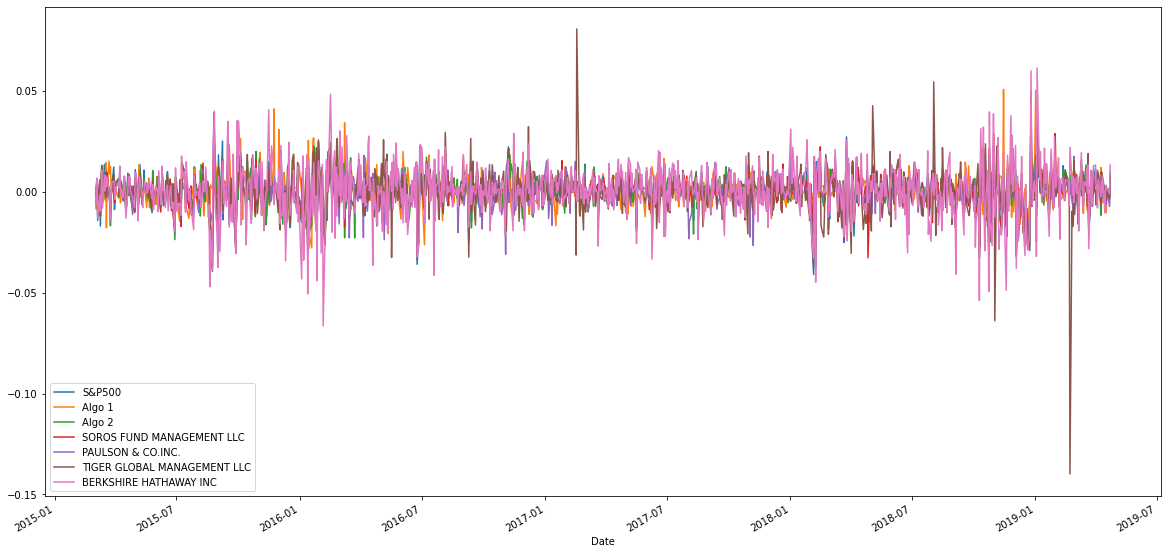

In [17]:
# Plot daily returns of all portfolios
combined_data.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

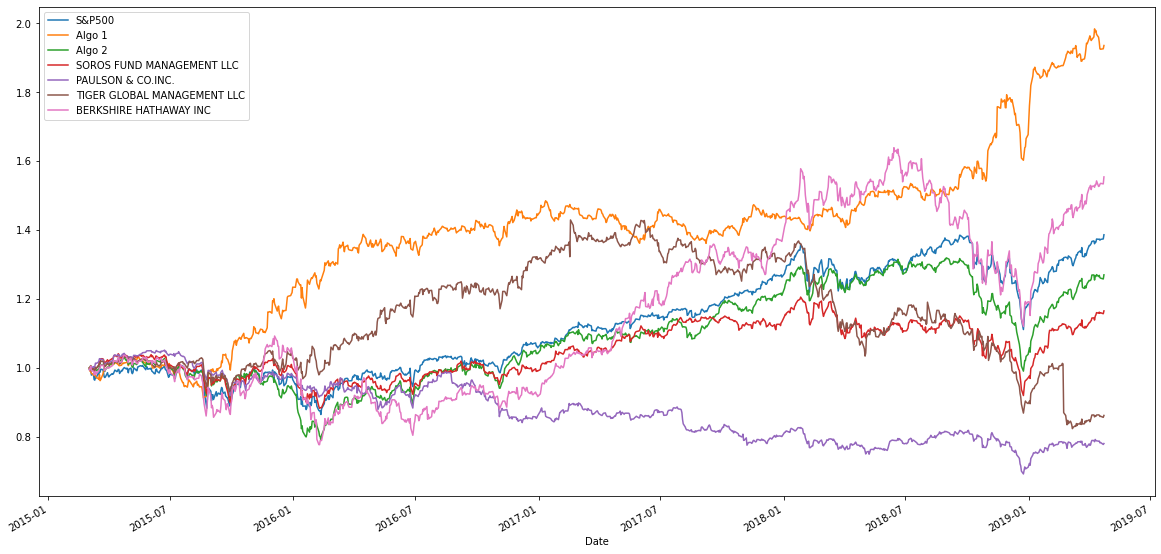

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_data).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

### Results of the Portfolio's Peformance Analysis:
From the cummulative returns results, it can be noticed that S&P 500 is out performed by Berkshire Hathaway Inc and Algo 2.


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

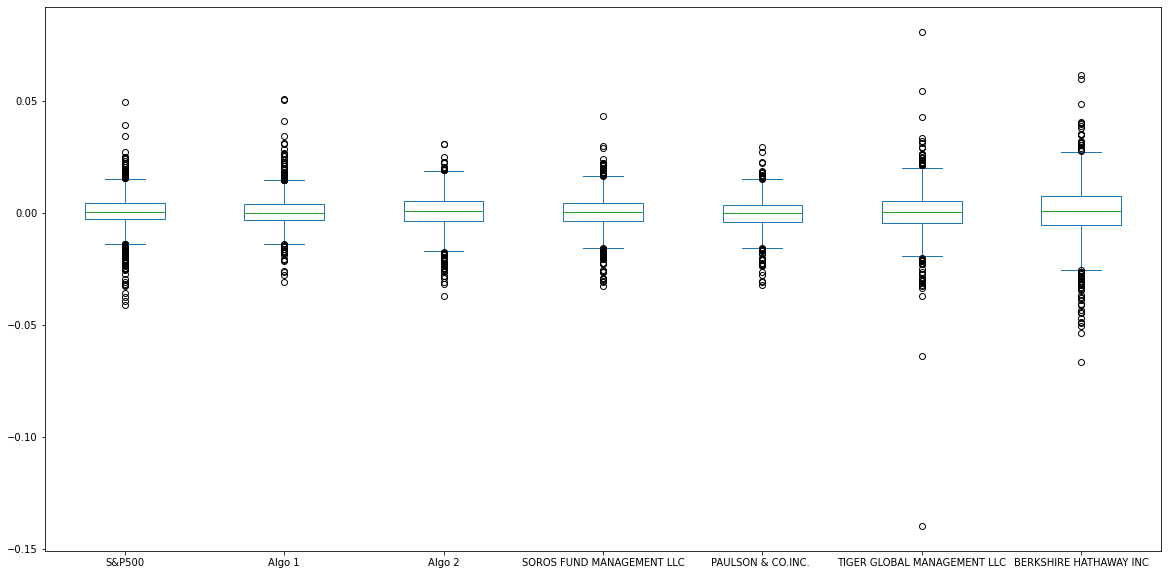

In [19]:
# Box plot to visually show risk 
combined_data.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
combined_data_std = combined_data.std()
combined_data_std

S&P500                         0.008554
Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
sp500_history_std =  sp500_history.std()
sp500_history_std.head()

S&P500    0.008111
dtype: float64

In [22]:
# Determine which portfolios are riskier than the S&P 500
riskier_portfolio = [combined_data_std > combined_data_std['S&P500']]
riskier_portfolio

[S&P500                         False
 Algo 1                         False
 Algo 2                         False
 SOROS FUND MANAGEMENT LLC      False
 PAULSON & CO.INC.              False
 TIGER GLOBAL MANAGEMENT LLC     True
 BERKSHIRE HATHAWAY INC          True
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_data_std * np.sqrt(252)
annualized_std.head()

S&P500                       0.135786
Algo 1                       0.120967
Algo 2                       0.132430
SOROS FUND MANAGEMENT LLC    0.125335
PAULSON & CO.INC.            0.111488
dtype: float64

### Determining which portfolios are riskier than the S&P 500

According to the portfolio standard deviation results, the portfolios riskier than S&P 500 are Tiger Global Management LLC and Berkshire Hathaway INC. 

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

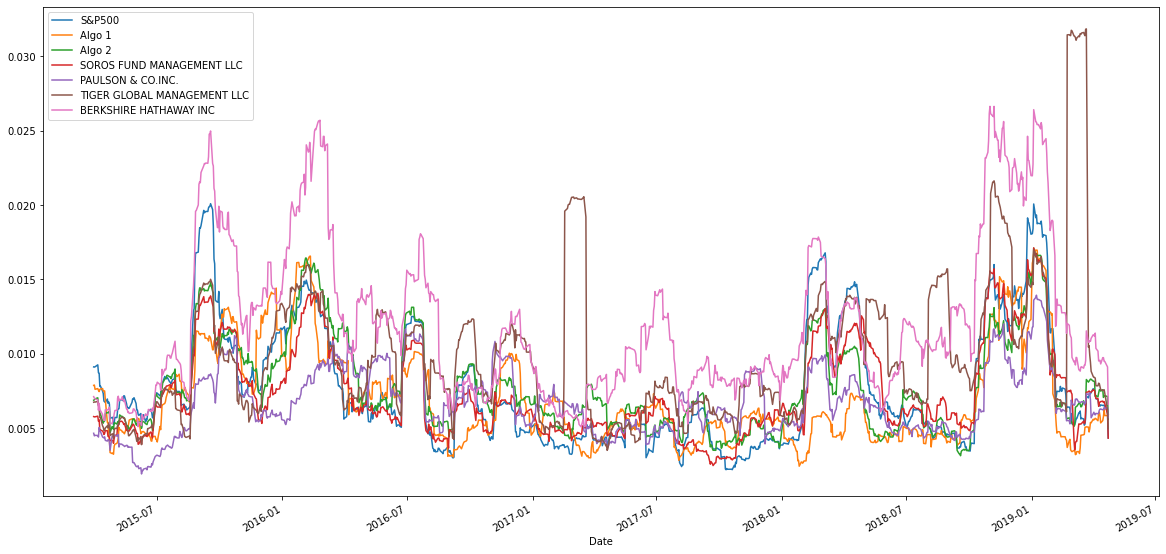

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
combined_data.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

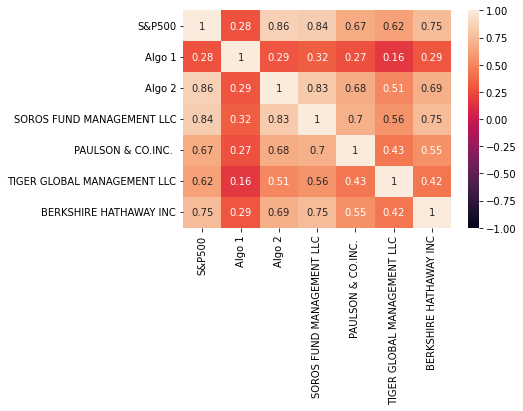

In [25]:
# Calculate the correlation
correlation = combined_data.corr()
# Display de correlation matrix
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

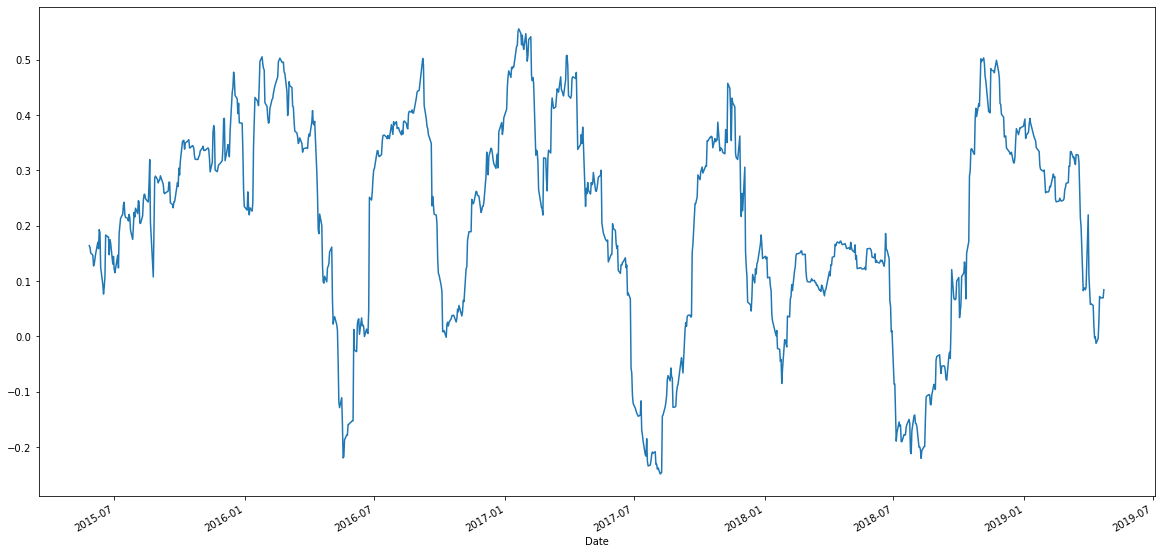

In [26]:
# Calculate covariance of a single portfolio
covariance = combined_data['Algo 1'].rolling(window=60).cov(combined_data['S&P500'])
# Calculate variance of S&P 500
variance = combined_data['S&P500'].rolling(window=60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(20,10)) 

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

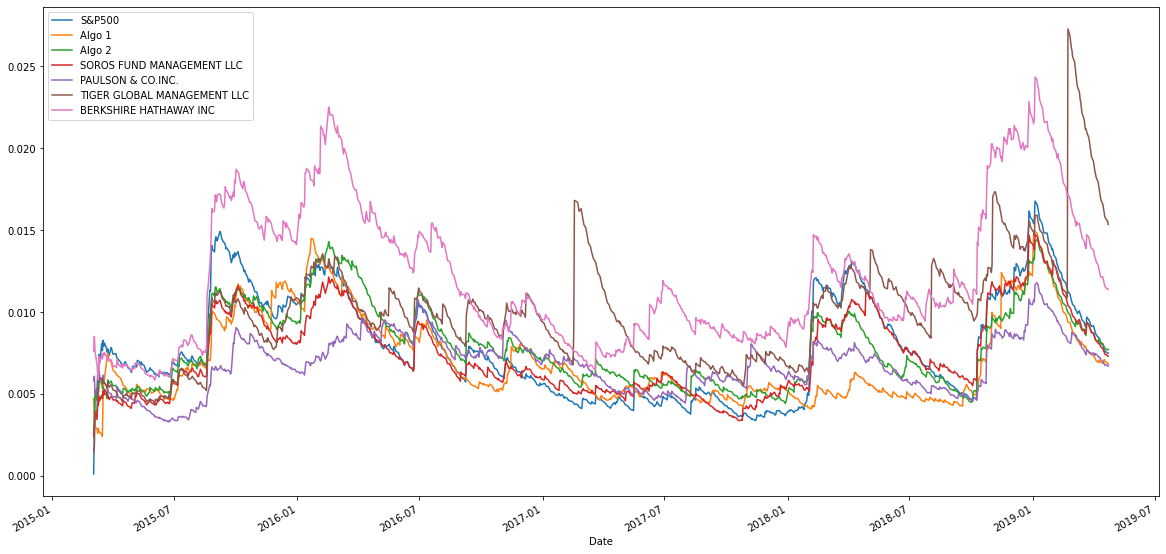

In [27]:
# Use `ewm` to calculate the rolling window
combined_data.ewm(halflife=21,adjust=False).std().plot(figsize=(20,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_data.mean() * 252) / (combined_data_std * np.sqrt(252))
sharpe_ratios.head()

S&P500                       0.648267
Algo 1                       1.378648
Algo 2                       0.501364
SOROS FUND MANAGEMENT LLC    0.356417
PAULSON & CO.INC.           -0.483570
dtype: float64

<AxesSubplot:>

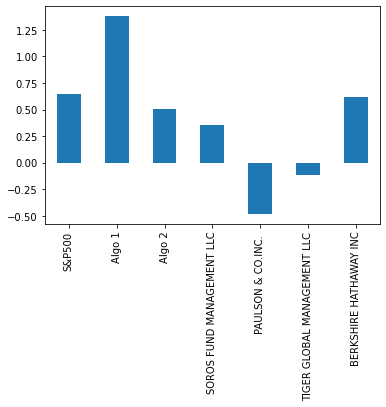

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algorithmic Strategies as whole outperformed both the market(S&P 500) and the whales portfolio. Algo 1 most specifically outperforms S&P 500.

---

# Creating Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [30]:

# Reading data from 1st stock
apple_csv_path = Path("Resources/aapl_historical.csv")
apple = pd.read_csv(apple_csv_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
apple.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [31]:
# Reading data from 2nd stock
costco_csv_path = Path("Resources/cost_historical.csv")
cotsco = pd.read_csv(costco_csv_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cotsco.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [32]:
# Reading data from 3rd stock
google_csv_path = Path("Resources/goog_historical.csv")
google = pd.read_csv(google_csv_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
google.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [33]:
# Combine all stocks in a single DataFrame
combined_stock= pd.concat([cotsco, google, apple], axis="columns", join="inner")
combined_stock.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,COST,243.47,GOOG,1162.38,AAPL,200.72
2019-05-08,COST,241.34,GOOG,1166.27,AAPL,202.90
2019-05-07,COST,240.18,GOOG,1174.10,AAPL,202.86
2019-05-06,COST,244.23,GOOG,1189.39,AAPL,208.48
2019-05-03,COST,244.62,GOOG,1185.40,AAPL,211.75


In [34]:
# Reset Date index
combined_stock.reset_index(drop=True)
combined_stock.sort_index(inplace=True)

In [35]:
# Reorganize portfolio data by having a column per symbol
combined_stock = combined_stock.drop(columns = ['Symbol', 'Symbol', 'Symbol'])
combined_stock.columns = [ 'Cost', 'Goog', 'Aapl']
combined_stock.head()

,Cost,Goog,Aapl
Trade DATE,,,
2018-05-11,195.76,1098.26,188.59
2018-05-14,195.88,1100.20,188.15
2018-05-15,195.48,1079.23,186.44
2018-05-16,198.71,1081.77,188.18
2018-05-17,199.60,1078.59,186.99


In [36]:
# Calculate daily returns
daily_stock_returns = combined_stock.pct_change()
# Drop NAs
daily_stock_returns = daily_stock_returns.dropna()
# Display sample data
daily_stock_returns.head()

,Cost,Goog,Aapl
Trade DATE,,,
2018-05-14,0.000613,0.001766,-0.002333
2018-05-15,-0.002042,-0.019060,-0.009088
2018-05-16,0.016523,0.002354,0.009333
2018-05-17,0.004479,-0.002940,-0.006324
2018-05-18,-0.003206,-0.011339,-0.003637


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
weighted_returns = daily_stock_returns.dot(weights)
# Display sample data
weighted_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame .. sp500_history, algo_return, whale_return,
combined_stock_returns = pd.concat([combined_data, weighted_returns ], axis="columns", join="inner")
combined_stock_returns.rename(columns={0: "Return"}, inplace=True)
combined_stock_returns.head()

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Return
2018-05-14,0.000884,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.000015
2018-05-15,-0.006842,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.010064
2018-05-16,0.004061,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.009403
2018-05-17,-0.000856,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,-0.001595
2018-05-18,-0.002632,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212,-0.006061


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_stock_returns.dropna(inplace=(True))

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
daily_std = combined_stock_returns.std()
annualized_std = daily_std * np.sqrt(252)
annualized_std

S&P500                         0.152054
Algo 1                         0.133704
Algo 2                         0.139556
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Return                         0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

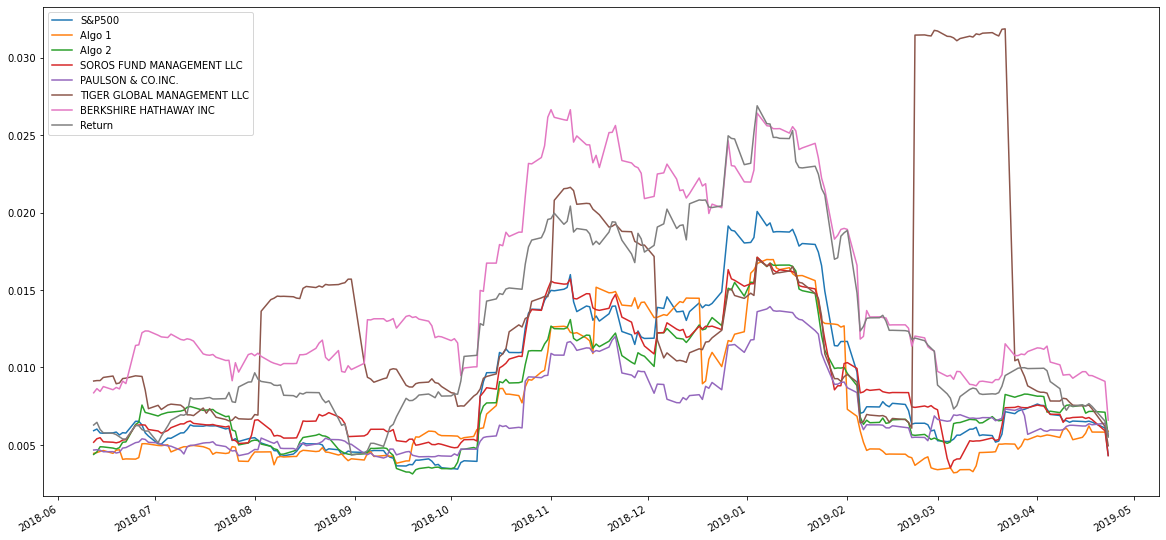

In [41]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
rolling_std = combined_stock_returns.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

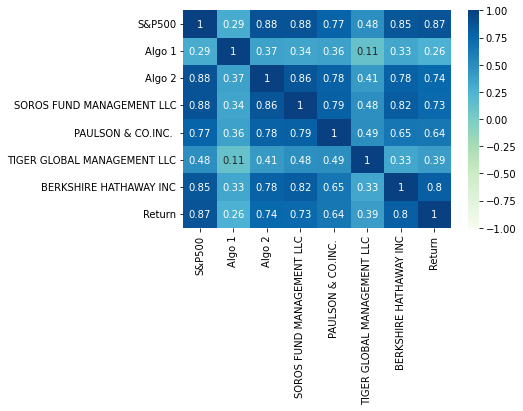

In [42]:
# Calculate and plot the correlation
price_correlation = combined_stock_returns.corr()
sns.heatmap(price_correlation, vmin=-1, vmax=1, cmap="GnBu", annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

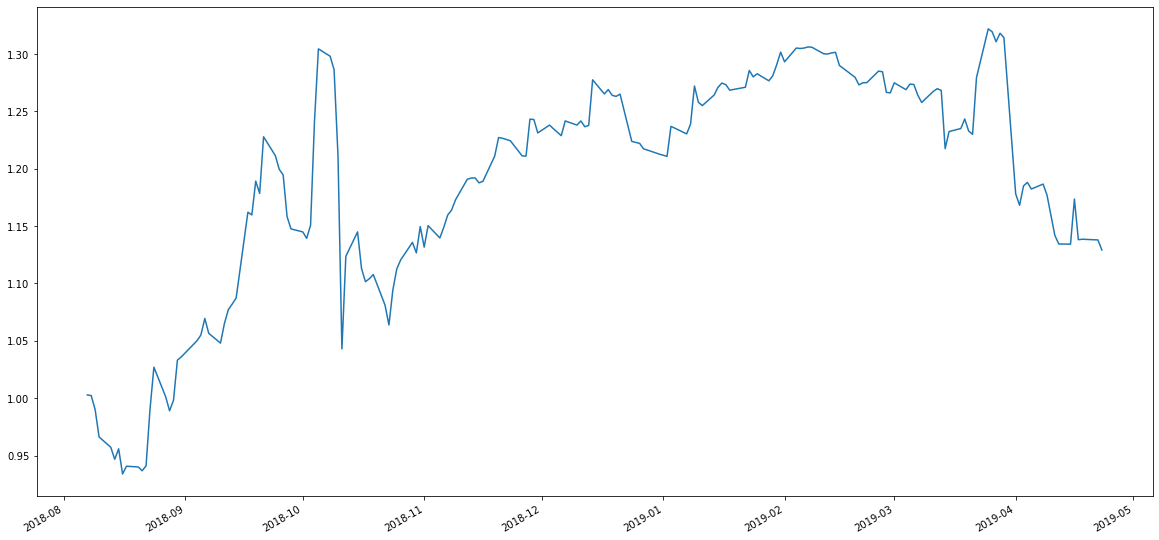

In [43]:
# Calculate and plot Beta
rolling_covariance = combined_stock_returns['Return'].rolling(window=60).cov(combined_data['S&P500'])
rolling_variance = combined_data['S&P500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (combined_stock_returns.mean() * 252) / (combined_stock_returns.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios.sort_values(ascending=False)
sharpe_ratios.head()

Algo 1                       2.035665
Return                       0.933123
S&P500                       0.584820
SOROS FUND MANAGEMENT LLC    0.430713
PAULSON & CO.INC.            0.258738
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

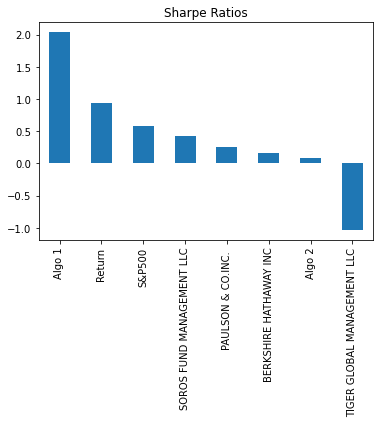

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?
    
1- Compared to S&P 500 portfolio, the customed portfolio returns is more volatile. The custom portfolio return compared to all portfolios as whole (custom portfolio and other portfolios) is among the most volatile with Tiger Global Management LLC and Berkshire Hathaway INC.

2- The custom portfolio is most highly correlated to Algo 1 and S&P 500.

3- From the bar plot of sharpe ratio, Algo 1 and Return are the most performing.

4- According to sharpe ratio analysis of both portfolios, Tiger Global Management LLC.

5- In conclusion, Harold's combined portfolio as a whole is not better than the custom portfolio. 